## DBSCAN
Density-Based Spatail Clustering of Applications with Noise

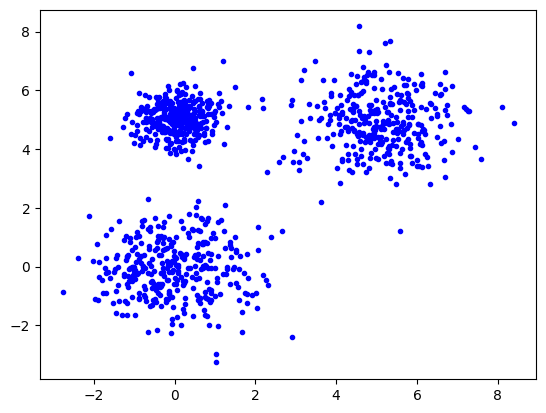

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:,0], X[:,1], marker='.', color='blue')
plt.show()


Number of clusters found by DBSCAN: 3


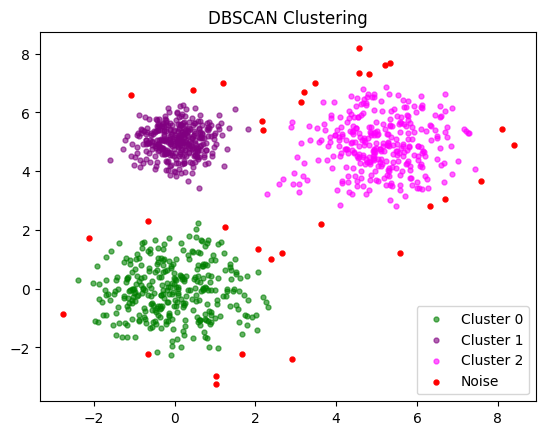

In [4]:

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

# Define custom colors
cluster_colors = ['green','purple', 'magenta']

noise_color = 'red'

# Plot each cluster
unique_labels = set(labels)
for k in unique_labels:
    class_member_mask = (labels == k)
    xy = X[class_member_mask]
    
    if k == -1:
        # Noise points
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=noise_color, marker='.', label='Noise')
    else:
        color = cluster_colors[k % len(cluster_colors)]
        plt.scatter(xy[:, 0], xy[:, 1], s=50, c=color, marker='.', alpha=0.6, label=f'Cluster {k}')

plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
